# 1.We have a group of workers and we are about to evaluate their skills giving to each feature a mark from 1 to 10 
1. Memorizing numbers
2. Ability to solve mathematical tasks
3. Resourcefulness through personal contact
4. Ability to create algorithms
5. Confidence while performing
6. Team spirit
7. Resourcefulness
8. Partnership
9. Recognition in the team
10. Ability to persuade
# Our target - to unite similar people in the groups and find out the number of such groups

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [50]:
data = pd.read_csv(r'C:\Users\danys\Downloads\assess.txt', sep='\t', index_col='NAME')

In [51]:
data.to_csv()
data.drop(columns='NR', inplace=True)

In [52]:
result = linkage(data, 'ward', 'euclidean')

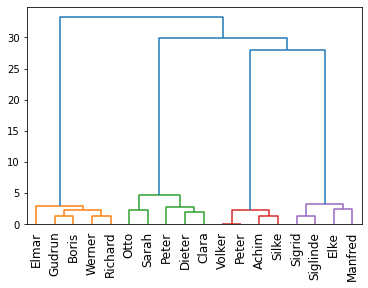

In [84]:
clusters = dendrogram(result, labels=data.index.tolist(), leaf_rotation=90.)

In [70]:
data['cluster'] = fcluster(result, 20, criterion='distance')

In [71]:
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,cluster
NAME,,,,,,,,,,,
Volker,10,10,9,10,10,10,9,10,10,9,3
Sigrid,10,10,4,10,5,5,4,5,4,3,4
Elmar,5,4,10,5,10,4,10,5,3,10,1
Peter,10,10,9,10,10,10,9,10,10,9,3
Otto,4,3,5,4,3,10,4,10,10,5,2


In [72]:
data.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


# 2.We have data about protein consumption over the Europe
# Let's find out groups of countries which citizens prefer common food to get protein

In [88]:
protein = pd.read_csv(r'C:\Users\danys\Downloads\Protein Consumption in Europe.csv', sep=';', index_col='Country', decimal=',')

In [89]:
protein.head(10)

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
E_Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5


Because of large numbers in columns 'Cereals', 'WhiteMean', 'Milk' comparing to the others - we need
to use standartization of our data


In [90]:
from sklearn import preprocessing

In [94]:
standartized = preprocessing.scale(protein)
standartized_protein = pd.DataFrame(standartized, index=protein.index, columns=protein.columns)
standartized_protein.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


In [95]:
link = linkage(standartized_protein, method='ward', metric='euclidean')

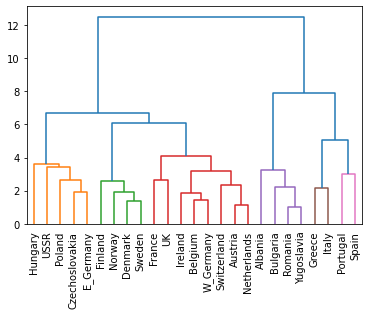

In [114]:
dendogram = dendrogram(link, truncate_mode='lastp', color_threshold=5, 
                       leaf_rotation=90., labels=standartized_protein.index.tolist())

In [115]:
protein['cluster'] = fcluster(link, 6, criterion='distance')
protein.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,cluster
Country,,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,4
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,3
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,4
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1


In [116]:
protein.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.560,2.5400,4.260
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.550,1.1750,2.125
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.650,2.0625,4.175
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.950,5.0500,2.975
5,8.1250,3.8000,2.4750,11.2000,7.625,33.675,3.975,5.6750,7.075
